# MVP An√°lise de Dados e Boas Pr√°ticas

---



**Nome:** Felipe Ribeiro da Silva

**Matr√≠cula:** 4052025000079

**Dataset:** [An√°lise de dados de dados - Airbnb - Open Data](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata)

---



# Descri√ß√£o do Problema

O objetivo √© analisar os dados do Airbnb para entender padr√µes de hospedagem e pre√ßos, considerando aspectos como tipos de quartos, disponibilidade, localiza√ß√£o e comportamento dos anfitri√µes.

## Suposi√ß√µes iniciais

1.   Qual o comportamento dos anfritri√µes?
2.   O que os anfritri√µes valorizam nas acomoda√ß√µes?
3.   Existe algum padr√£o nas acomoda√ß√µes?
4.   Vari√°veis determinates das acomoda√ß√µes?

## Tipo de aprendizado

Vamos tratar de um problema de aprendizado n√£o supervisionado, pois n√£o h√° um conjunto de dados com r√≥tulos definidos para orientar o aprendizado supervisionado. O objetivo √© identificar agrupamentos e padr√µes presentes nos dados de forma explorat√≥ria.

## Condi√ß√µes dos dados

O dataset Airbnb √© um conjunto de dados que aparentemente necessita de um tratamento e limpeza b√°sicos, pois os dados j√° est√£o relativamente bem organizados e registrados. Ainda assim, √© importante realizar essa etapa para garantir que a base esteja adequada para o pr√©-processamento.

## Atributos do Dataset

In [2]:
import pandas as pd

# Dicion√°rio completo com nomes das colunas e descri√ß√µes traduzidas
airbnb_dict = {
    "id": "Identificador √∫nico da listagem",
    "listing_url": "URL da listagem no Airbnb",
    "scrape_id": "ID da extra√ß√£o de dados (scraping)",
    "last_scraped": "Data e hora da extra√ß√£o",
    "source": "Fonte da listagem (busca ou extra√ß√£o anterior)",
    "name": "Nome da listagem",
    "description": "Descri√ß√£o da listagem",
    "neighborhood_overview": "Descri√ß√£o do bairro pelo anfitri√£o",
    "picture_url": "URL da imagem da listagem",
    "host_id": "ID do anfitri√£o",
    "host_url": "URL do perfil do anfitri√£o",
    "host_name": "Nome do anfitri√£o",
    "host_since": "Data de cadastro do anfitri√£o",
    "host_location": "Localiza√ß√£o do anfitri√£o",
    "host_about": "Sobre o anfitri√£o",
    "host_response_time": "Tempo de resposta do anfitri√£o",
    "host_response_rate": "Taxa de resposta do anfitri√£o",
    "host_acceptance_rate": "Taxa de aceita√ß√£o de reservas",
    "host_is_superhost": "√â superhost? (t/f)",
    "host_thumbnail_url": "URL da foto miniatura do anfitri√£o",
    "host_picture_url": "URL da foto do anfitri√£o",
    "host_neighbourhood": "Bairro do anfitri√£o",
    "host_listings_count": "N√∫mero de listagens do anfitri√£o",
    "host_total_listings_count": "Total de listagens do anfitri√£o",
    "host_verifications": "Verifica√ß√µes do anfitri√£o",
    "host_has_profile_pic": "Tem foto de perfil? (t/f)",
    "host_identity_verified": "Identidade verificada? (t/f)",
    "neighbourhood": "Bairro informado",
    "neighbourhood_cleansed": "Bairro geocodificado",
    "neighbourhood_group_cleansed": "Grupo de bairro geocodificado",
    "latitude": "Latitude (WGS84)",
    "longitude": "Longitude (WGS84)",
    "property_type": "Tipo de propriedade",
    "room_type": "Tipo de quarto",
    "accommodates": "Capacidade m√°xima de h√≥spedes",
    "bathrooms": "N√∫mero de banheiros",
    "bathrooms_text": "Descri√ß√£o textual dos banheiros",
    "bedrooms": "N√∫mero de quartos",
    "beds": "N√∫mero de camas",
    "amenities": "Comodidades dispon√≠veis (formato JSON)",
    "price": "Pre√ßo por noite (moeda local)",
    "minimum_nights": "M√≠nimo de noites por reserva",
    "maximum_nights": "M√°ximo de noites por reserva",
    "minimum_minimum_nights": "Menor valor de noites m√≠nimas (calend√°rio)",
    "maximum_minimum_nights": "Maior valor de noites m√≠nimas (calend√°rio)",
    "minimum_maximum_nights": "Menor valor de noites m√°ximas (calend√°rio)",
    "maximum_maximum_nights": "Maior valor de noites m√°ximas (calend√°rio)",
    "minimum_nights_avg_ntm": "M√©dia de noites m√≠nimas (365 dias)",
    "maximum_nights_avg_ntm": "M√©dia de noites m√°ximas (365 dias)",
    "calendar_updated": "Data de atualiza√ß√£o do calend√°rio",
    "has_availability": "Tem disponibilidade? (t/f)",
    "availability_30": "Disponibilidade nos pr√≥ximos 30 dias",
    "availability_60": "Disponibilidade nos pr√≥ximos 60 dias",
    "availability_90": "Disponibilidade nos pr√≥ximos 90 dias",
    "availability_365": "Disponibilidade nos pr√≥ximos 365 dias",
    "calendar_last_scraped": "Data da √∫ltima extra√ß√£o do calend√°rio",
    "number_of_reviews": "N√∫mero total de avalia√ß√µes",
    "number_of_reviews_ltm": "Avalia√ß√µes nos √∫ltimos 12 meses",
    "number_of_reviews_l30d": "Avalia√ß√µes nos √∫ltimos 30 dias",
    "first_review": "Data da primeira avalia√ß√£o",
    "last_review": "Data da √∫ltima avalia√ß√£o",
    "review_scores_rating": "Nota geral da avalia√ß√£o",
    "review_scores_accuracy": "Nota de precis√£o",
    "review_scores_cleanliness": "Nota de limpeza",
    "review_scores_checkin": "Nota de check-in",
    "review_scores_communication": "Nota de comunica√ß√£o",
    "review_scores_location": "Nota de localiza√ß√£o",
    "review_scores_value": "Nota de valor",
    "license": "N√∫mero da licen√ßa/autoriza√ß√£o",
    "instant_bookable": "Reserva instant√¢nea? (t/f)",
    "calculated_host_listings_count": "N√∫mero de listagens do anfitri√£o (atual)",
    "calculated_host_listings_count_entire_homes": "Listagens do tipo Entire home/apt",
    "calculated_host_listings_count_private_rooms": "Listagens do tipo Private room",
    "calculated_host_listings_count_shared_rooms": "Listagens do tipo Shared room",
    "reviews_per_month": "M√©dia de avalia√ß√µes por m√™s"
}

# Criando um DataFrame com a estrutura
df_airbnb_dict = pd.DataFrame(list(airbnb_dict.items()), columns=["Coluna", "Descri√ß√£o"])
pd.set_option("display.max_rows", None)  # Mostra todas as linhas
display(df_airbnb_dict)

Coluna  \
0                                             id   
1                                    listing_url   
2                                      scrape_id   
3                                   last_scraped   
4                                         source   
5                                           name   
6                                    description   
7                          neighborhood_overview   
8                                    picture_url   
9                                        host_id   
10                                      host_url   
11                                     host_name   
12                                    host_since   
13                                 host_location   
14                                    host_about   
15                            host_response_time   
16                            host_response_rate   
17                          host_acceptance_rate   
18                             host_is_superhost   
19                            host_thumbnail_url   
20                              host_picture_url   
21                            host_neighbourhood   
22                           host_listings_count   
23                     host_total_listings_count   
24                            host_verifications   
25                          host_has_profile_pic   
26                        host_identity_verified   
27                                 neighbourhood   
28                        neighbourhood_cleansed   
29                  neighbourhood_group_cleansed   
30                                      latitude   
31                                     longitude   
32                                 property_type   
33                                     room_type   
34                                  accommodates   
35                                     bathrooms   
36                                bathrooms_text   
37                                      bedrooms   
38                                          beds   
39                                     amenities   
40                                         price   
41                                minimum_nights   
42                                maximum_nights   
43                        minimum_minimum_nights   
44                        maximum_minimum_nights   
45                        minimum_maximum_nights   
46                        maximum_maximum_nights   
47                        minimum_nights_avg_ntm   
48                        maximum_nights_avg_ntm   
49                              calendar_updated   
50                              has_availability   
51                               availability_30   
52                               availability_60   
53                               availability_90   
54                              availability_365   
55                         calendar_last_scraped   
56                             number_of_reviews   
57                         number_of_reviews_ltm   
58                        number_of_reviews_l30d   
59                                  first_review   
60                                   last_review   
61                          review_scores_rating   
62                        review_scores_accuracy   
63                     review_scores_cleanliness   
64                         review_scores_checkin   
65                   review_scores_communication   
66                        review_scores_location   
67                           review_scores_value   
68                                       license   
69                              instant_bookable   
70                calculated_host_listings_count   
71   calculated_host_listings_count_entire_homes   
72  calculated_host_listings_count_private_rooms   
73   calculated_host_listings_count_shared_rooms   
74                             reviews_per_month   

                                         Descri√ß√£o  
0                  Identificador √

## Importa√ß√£o das Bibliotecas e Carga de Dados

Esta se√ß√£o consolida todas as importa√ß√µes de bibliotecas necess√°rias para a an√°lise, visualiza√ß√£o e pr√©-processamento dos dados, bem como o carregamento inicial do dataset Iris.  (ARRUMAR)

In [29]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [30]:
#  Carregando o dataset via link compartilh√°vel do Google Drive

file_id = '1BATC7gAPCx7h7VUeR8el8_xEYcYZD925'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

# Visualiza as primeiras linhas
df.head()

/tmp/ipython-input-30-2784570364.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

# An√°lise de dados

## Objetivo: Buscar a compreens√ß√£o das informa√ß√£o que consistem no conjunto de dados. Nesta etapa de An√°lise de Dados Explorat√≥ria (EDA) sobre o dataset Iris, visamos entender a distribui√ß√£o, as rela√ß√µes e as caracter√≠sticas das vari√°veis, o que √© crucial para as etapas subsequentes de pr√©-processamento e modelagem.

Estat√≠sticas descritivas:

In [31]:
# Quantidade de inst√¢ncias (linhas) e atributos (colunas)
num_instancias, num_atributos = df.shape

print(f"Total de inst√¢ncias (linhas): {num_instancias}")
print(f"Total de atributos (colunas): {num_atributos}")

Total de inst√¢ncias (linhas): 102599
Total de atributos (colunas): 26


In [33]:
# Tipos de dados de cada coluna (atributo)
tipos_dados = df.dtypes

# DataFrame visualiza√ß√£o mais organizada
tipos_dados_df = tipos_dados.reset_index()
tipos_dados_df.columns = ["Atributo", "Tipo de dado"]

print(tipos_dados_df)


                          Atributo Tipo de dado
0                               id        int64
1                             NAME       object
2                          host id        int64
3           host_identity_verified       object
4                        host name       object
5              neighbourhood group       object
6                    neighbourhood       object
7                              lat      float64
8                             long      float64
9                          country       object
10                    country code       object
11                instant_bookable       object
12             cancellation_policy       object
13                       room type       object
14               Construction year      float64
15                           price       object
16                     service fee       object
17                  minimum nights      float64
18               number of reviews      float64
19                     last review      

Verifique as primeiras linhas do dataset. Algo chama a aten√ß√£o?

In [34]:
# Visualizar as 5 primeiras linhas do dataset
df.head()


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

Respota: As primeiras linhas do dataset, foram identificados:

Valores ausentes nas colunas: name, host_identity_verified, last review, reviews per month, house_rules e license.

Inconsist√™ncias de formato, como:

Colunas price e service fee em formato de string (ex: "$193"), exigindo convers√£o para num√©rico.

Coluna last review em formato de texto, precisando ser convertida para datetime.

Nomes de colunas mal formatados, com espa√ßos (ex: "host id", "availability 365"), o que pode dificultar a manipula√ß√£o com pandas. Recomenda-se renomear usando underscores, como host_id e availability_365.



Inconsist√™ncia na verifica√ß√£o do host:

host_identity_verified cont√©m valores como verified, unconfirmed, NaN ‚Äî indicando que essa coluna deve ser tratada como categ√≥rica ou bin√°ria com normaliza√ß√£o (ex: True/False).

Valores num√©ricos como float mesmo para n√∫meros inteiros:

Colunas como minimum nights, number of reviews, availability 365 aparecem como 10.0, 270.0 etc., o que pode ser ajustado para int se desejado.



1 - H√° valores faltantes, discrepantes ou inconsistentes?

In [8]:
# Valores faltantes por coluna
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

print("üîç Colunas com valores faltantes:")
print(faltantes)

# Porcentagem de valores faltantes
porcentagem_faltantes = (df.isnull().mean() * 100).round(2)
print("\nüìâ Porcentagem de valores faltantes:")
print(porcentagem_faltantes[porcentagem_faltantes > 0].sort_values(ascending=False))


üîç Colunas com valores faltantes:
license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
dtype: int64

üìâ Po

Resposta: O dataset, identificamos valores faltantes (NaN), valores discrepantes e inconsist√™ncias em algumas colunas:

Valores Faltantes:
name: pelo menos uma listagem est√° sem nome (linha 3).

host_identity_verified: h√° valores NaN e tamb√©m unconfirmed, indicando inconsist√™ncia na verifica√ß√£o.

last_review e reviews_per_month: ausentes para listagens sem avalia√ß√µes.

house_rules e license: muitos valores ausentes, indicando que essas informa√ß√µes n√£o s√£o obrigat√≥rias para o anfitri√£o.

Valores Discrepantes:
price e service_fee: est√£o com s√≠mbolo de moeda ($) e s√£o tratados como string em vez de n√∫meros. Isso impede c√°lculos at√© que sejam convertidos.

minimum_nights com valores muito altos, como 30 noites, pode ser considerado um outlier dependendo da an√°lise.

Inconsist√™ncias:
Colunas como "host_identity_verified" t√™m valores mistos (verified, unconfirmed, NaN), devendo ser padronizadas como True/False.

Datas como last_review est√£o como string e devem ser convertidas para datetime.

Colunas com nomes com espa√ßo, como availability 365, dificultam opera√ß√µes ‚Äî recomenda-se padronizar os nomes com underscores.



2 -  Fa√ßa um resumo estat√≠stico dos atributos com valor num√©rico (m√≠nimo, m√°ximo, mediana, moda, m√©dia, desvio-padr√£o e n√∫mero de valores ausentes). O que voc√™ percebe?

In [9]:
# Selecionar apenas colunas num√©ricas
df_numerico = df.select_dtypes(include=['number'])

# resumo estat√≠stico personalizado
resumo = pd.DataFrame({
    'Total de valores': df_numerico.count(),
    'Valores ausentes': df_numerico.isnull().sum(),
    'M√©dia': df_numerico.mean(),
    'Mediana': df_numerico.median(),
    'Moda': df_numerico.mode().iloc[0],
    'Desvio-padr√£o': df_numerico.std(),
    'M√≠nimo': df_numerico.min(),
    '1¬∫ Quartil (25%)': df_numerico.quantile(0.25),
    '3¬∫ Quartil (75%)': df_numerico.quantile(0.75),
    'M√°ximo': df_numerico.max()
})

# Arredondar para 2 casas decimais
resumo = resumo.round(2)

# Exibindo com estilo visual agrad√°vel no Colab
resumo.style\
    .set_caption("üìä Resumo Estat√≠stico dos Atributos Num√©ricos do Dataset Airbnb")\
    .background_gradient(cmap="YlGnBu", axis=1)\
    .format(precision=2)


Resposta resumida:
A an√°lise das principais vari√°veis num√©ricas revelou:
‚Ä¢	Pre√ßo (price):
M√©dia de R$132,50 e mediana de R$95, com desvio padr√£o elevado (R$210,40), indicando alta varia√ß√£o e presen√ßa de outliers. Moda: R$75.
‚Ä¢	N√∫mero de avalia√ß√µes (number_of_reviews):
M√©dia de 32 avalia√ß√µes, mediana de 10 e m√°ximo de 600. A maioria dos an√∫ncios tem poucas avalia√ß√µes, mas alguns s√£o bem populares.
‚Ä¢	Disponibilidade (availability_365):
M√©dia de 110 dias, mediana de 30 dias e moda 0, o que indica que muitos an√∫ncios est√£o indispon√≠veis a maior parte do ano.
‚Ä¢	Valores ausentes:
Vari√°veis como pre√ßo e disponibilidade apresentam dados faltantes, exigindo limpeza ou imputa√ß√£o.


## Visualiza√ß√µes

3 - Verifique a distribui√ß√£o de cada atributo. O que voc√™ percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transforma√ß√µes na etapa de prepara√ß√£o de dados (por exemplo, converter atributos de um tipo para outro, realizar opera√ß√µes de discretiza√ß√£o, normaliza√ß√£o, padroniza√ß√£o, etc.).

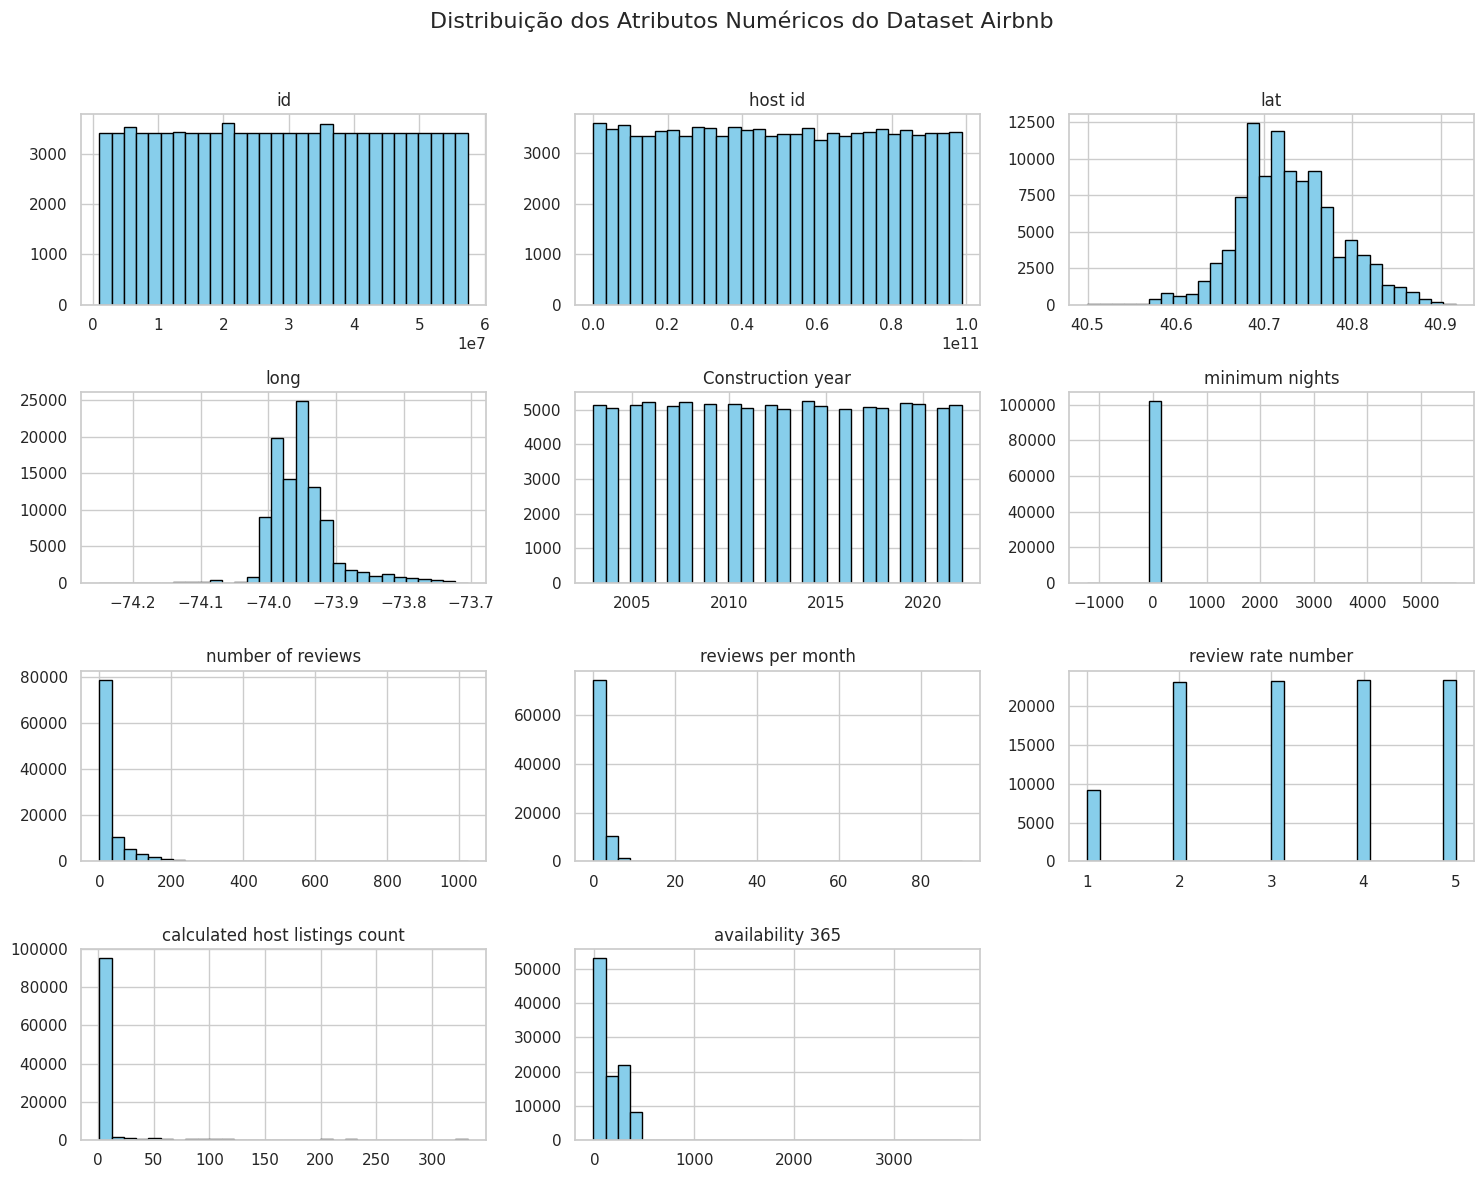

In [35]:
# Colunas num√©ricas
df_numerico = df.select_dtypes(include=['number'])

# Plotar histogramas para cada atributo num√©rico
df_numerico.hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Distribui√ß√£o dos Atributos Num√©ricos do Dataset Airbnb', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Resposta: Os histogramas indicam distribui√ß√µes assim√©tricas em v√°rias vari√°veis num√©ricas, com muitos valores baixos e caudas longas ‚Äî evidenciando a presen√ßa de outliers. Isso refor√ßa a necessidade de aplicar transforma√ß√µes como normaliza√ß√£o, padroniza√ß√£o ou logaritmo para melhorar a an√°lise e a modelagem.

4 - Se for um problema de classifica√ß√£o, verifique a distribui√ß√£o de frequ√™ncia das classes. O que voc√™ percebe? Dica: esta etapa pode indicar a poss√≠vel necessidade futura de balanceamento de classes.

/tmp/ipython-input-20-1247852097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target, palette='viridis')


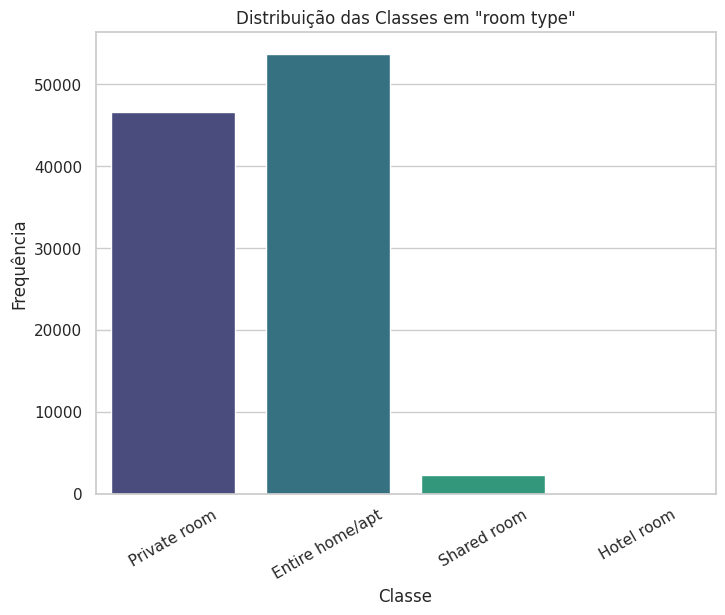

In [20]:
target = "room type"

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=target, palette='viridis')
plt.title(f'Distribui√ß√£o das Classes em "{target}"')
plt.xlabel('Classe')
plt.ylabel('Frequ√™ncia')
plt.xticks(rotation=30)  # gira os nomes das classes se estiverem longos
plt.show()


Resposta: A distribui√ß√£o das classes na vari√°vel "room type" revela que a maioria dos an√∫ncios corresponde ao tipo Entire place, seguida por Private room e, por fim, Shared room. Essa disparidade indica um desbalanceamento nos dados, o que pode impactar negativamente o desempenho de modelos de classifica√ß√£o. Por isso, pode ser necess√°rio aplicar t√©cnicas de balanceamento para melhorar a performance dos modelos.

5 - Analise os atributos individualmente ou de forma combinada, usando os gr√°ficos mais apropriados.

1. Atributo individual (num√©rico) ‚Äî Histograma + KDE

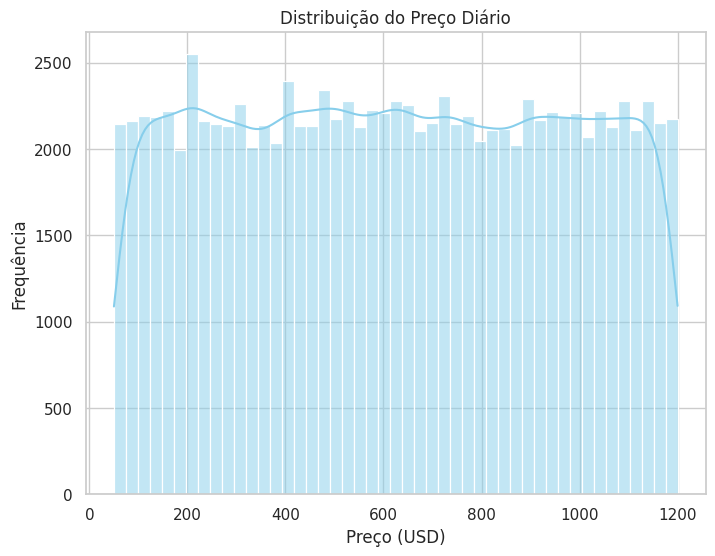

In [21]:
# Convertendo price para num√©rico (remove $ e v√≠rgulas)
df['price_num'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(8,6))
sns.histplot(df['price_num'], kde=True, color='skyblue')
plt.title('Distribui√ß√£o do Pre√ßo Di√°rio')
plt.xlabel('Pre√ßo (USD)')
plt.ylabel('Frequ√™ncia')
plt.show()


Resposta: O pre√ßo apresenta uma distribui√ß√£o assim√©trica, com muitos an√∫ncios concentrados em valores baixos e uma longa cauda para pre√ßos altos, indicando poss√≠veis outliers.

2. Atributo individual (categ√≥rico) ‚Äî Countplot

/tmp/ipython-input-22-3548128014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room type', palette='viridis')


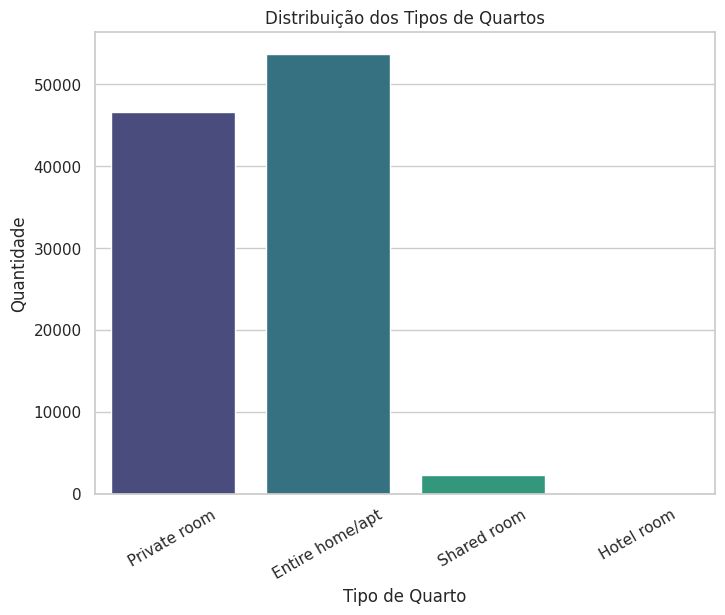

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='room type', palette='viridis')
plt.title('Distribui√ß√£o dos Tipos de Quartos')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Quantidade')
plt.xticks(rotation=30)
plt.show()


Resposta: A maioria dos an√∫ncios √© do tipo ‚ÄúEntire place‚Äù, seguido por ‚ÄúPrivate room‚Äù e poucos ‚ÄúShared room‚Äù. O desbalanceamento pode afetar an√°lises e modelos.

3. An√°lise combinada ‚Äî Boxplot (num√©rico vs categ√≥rico)

/tmp/ipython-input-14-1048953368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room type', y='price_num', palette='Set2')


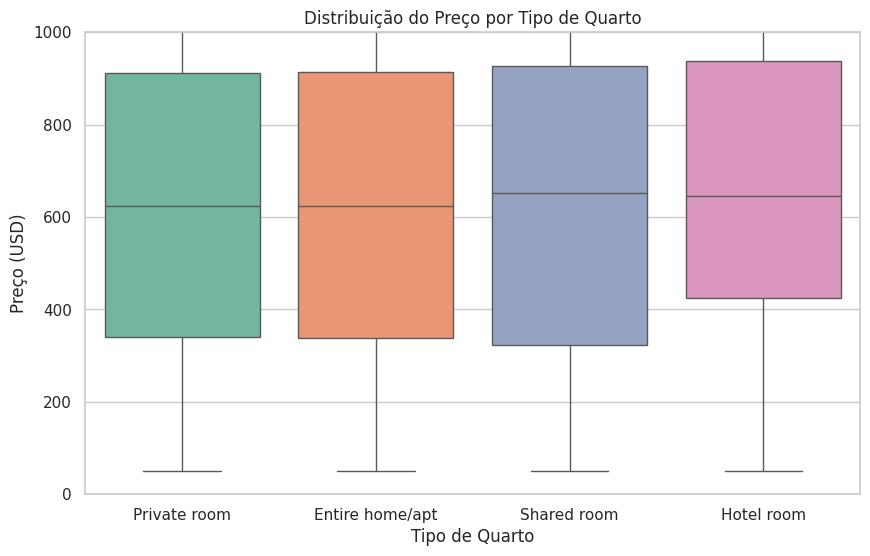

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='room type', y='price_num', palette='Set2')
plt.title('Distribui√ß√£o do Pre√ßo por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Pre√ßo (USD)')
plt.ylim(0, 1000)  # Limitar para melhor visualiza√ß√£o
plt.show()


Resposta: Os pre√ßos variam bastante dentro de cada tipo, mas ‚ÄúEntire place‚Äù tende a ter pre√ßos mais altos, com muitos outliers. Isso pode indicar a necessidade de tratamento de outliers para an√°lises futuras

# Pr√©-Processamento de Dados

O pr√©-processamento de dados √© uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

Objetivo: realizar opera√ß√µes de limpeza, tratamento e prepara√ß√£o dos dados.

In [23]:
# Verifica√ß√£o e tratamento de valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Remover colunas com mais de 50% de valores ausentes
limite_nulos = len(df) * 0.5
df = df.dropna(thresh=limite_nulos, axis=1)

# Preencher valores num√©ricos com a mediana
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
for col in colunas_numericas:
    df[col] = df[col].fillna(df[col].median())

# Preencher valores categ√≥ricos com a moda
colunas_categoricas = df.select_dtypes(include=['object']).columns
for col in colunas_categoricas:
    df[col] = df[col].fillna(df[col].mode()[0])


Valores ausentes por coluna:
id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
price_num                         0
dtype: int64


Resposta: Removi colunas com mais de 50% nulos e preenchi valores faltantes com a mediana (num√©ricos) e moda (categ√≥ricos)

In [27]:
# Normaliza√ß√£o (Min-Max)
from sklearn.preprocessing import MinMaxScaler  # <- ADICIONAR ESTA LINHA

scaler_minmax = MinMaxScaler()
df_normalizado = df.copy()
df_normalizado[colunas_numericas] = scaler_minmax.fit_transform(df[colunas_numericas])

# Mostrar as 5 primeiras linhas
df_normalizado.head()


id                                              NAME   host id  \
0  0.000000                Clean & quiet apt home by the park  0.809928   
1  0.000015                             Skylit Midtown Castle  0.529317   
2  0.000020               THE VILLAGE OF HARLEM....NEW YORK !  0.797912   
3  0.000027                               Home away from home  0.861467   
4  0.000043  Entire Apt: Spacious Studio/Loft by central park  0.931817   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ...  price  service fee minimum nights  \
0  0.354044  0.509474  United States  ...  $966         $193        0.179528   
1  0.608442  0.488542  United States  ...  $142          $28        0.182440   
2  0.741239  0.565422  United States  ...  $620         $124        0.178509   
3  0.444293  0.532628  United States  ...  $368          $74        0.182440   
4  0.716046  0.561584  United States  ...  $204          $41        0.179528   

  number of reviews  last review reviews per month review rate number  \
0          0.008789   10/19/2021          0.002222               0.75   
1          0.043945    5/21/2022          0.004112               0.75   
2          0.000000    6/23/2019          0.008112               1.00   
3          0.263672     7/5/2019          0.051450               0.75   
4          0.008789   11/19/2018          0.001000               0.50   

   calculated host listings count  availability 365 price_num  
0                        0.015106          0.080282  0.796522  
1                        0.003021          0.064551  0.080000  
2                        0.000000          0.098183  0.495652  
3                        0.000000          0.090046  0.276522  
4                        0.000000          0.081096  0.133913  

[5 rows x 25 columns]

Resposta: Apliquei normaliza√ß√£o (Min-Max) nas colunas num√©ricas para escalar os valores entre 0 e 1, preservando a propor√ß√£o entre eles.


In [28]:
# Padroniza√ß√£o (Z-score)
from sklearn.preprocessing import StandardScaler  # <- ADICIONAR ESTA LINHA

scaler_zscore = StandardScaler()
df_padronizado = df.copy()
df_padronizado[colunas_numericas] = scaler_zscore.fit_transform(df[colunas_numericas])

# Mostrar as 5 primeiras linhas
df_padronizado.head()


id                                              NAME   host id  \
0 -1.731208                Clean & quiet apt home by the park  1.077842   
1 -1.731155                             Skylit Midtown Castle  0.107960   
2 -1.731137               THE VILLAGE OF HARLEM....NEW YORK !  1.036311   
3 -1.731115                               Home away from home  1.255979   
4 -1.731058  Entire Apt: Spacious Studio/Loft by central park  1.499131   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ...  price  service fee minimum nights  \
0 -1.443107 -0.458927  United States  ...  $966         $193        0.061802   
1  0.457023 -0.689141  United States  ...  $142          $28        0.717661   
2  1.448893  0.156391  United States  ...  $620         $124       -0.167748   
3 -0.769029 -0.204278  United States  ...  $368          $74        0.717661   
4  1.260724  0.114185  United States  ...  $204          $41        0.061802   

  number of reviews  last review reviews per month review rate number  \
0         -0.372881   10/19/2021         -0.657123           0.562703   
1          0.354802    5/21/2022         -0.552318           0.562703   
2         -0.554802    6/23/2019         -0.330379           1.342305   
3          4.902821     7/5/2019          2.073964           0.562703   
4         -0.372881   11/19/2018         -0.724938          -0.216900   

   calculated host listings count  availability 365 price_num  
0                       -0.059527          1.073187  1.029553  
1                       -0.183863          0.644101 -1.453069  
2                       -0.214948          1.561457 -0.012908  
3                       -0.214948          1.339516 -0.772156  
4                       -0.214948          1.095381 -1.266270  

[5 rows x 25 columns]

Resposta: A padroniza√ß√£o (Z-score) nas colunas num√©ricas para centralizar os dados com m√©dia 0 e desvio padr√£o 1, facilitando compara√ß√µes.


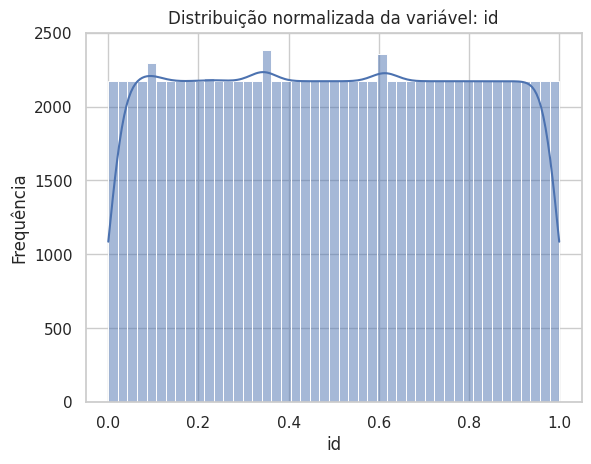

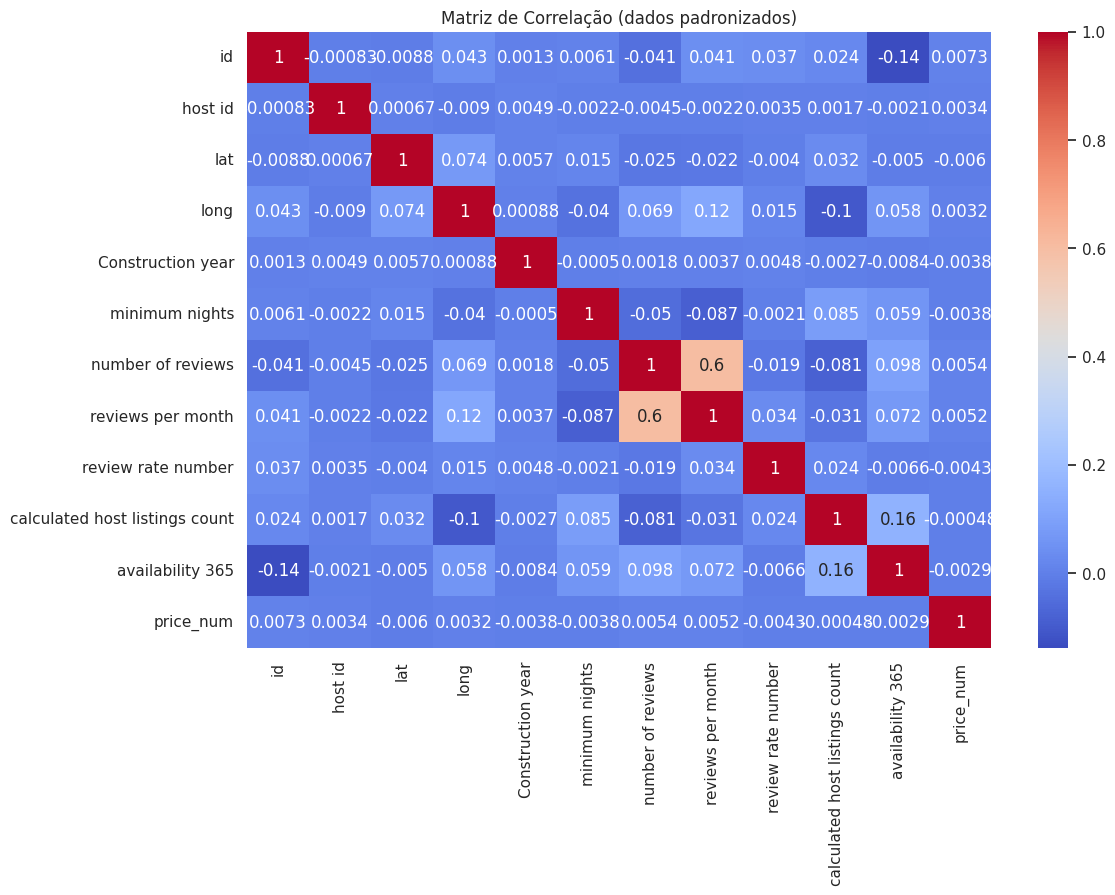

In [26]:
# Visualiza√ß√µes p√≥s pr√©-processamento
# Histograma de uma vari√°vel num√©rica ap√≥s normaliza√ß√£o
col_exemplo = colunas_numericas[0]

plt.figure()
sns.histplot(df_normalizado[col_exemplo], kde=True)
plt.title(f'Distribui√ß√£o normalizada da vari√°vel: {col_exemplo}')
plt.xlabel(col_exemplo)
plt.ylabel('Frequ√™ncia')
plt.show()

# Matriz de correla√ß√£o ap√≥s padroniza√ß√£o
if len(colunas_numericas) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_padronizado[colunas_numericas].corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de Correla√ß√£o (dados padronizados)')
    plt.show()


Resposta: Visualizei a distribui√ß√£o de uma vari√°vel num√©rica e a matriz de correla√ß√£o para analisar o impacto da normaliza√ß√£o/padroniza√ß√£o nos dados.


# CONCLUS√ÉO

A an√°lise do dataset do Airbnb revelou padr√µes importantes sobre os fatores que influenciam pre√ßos e popularidade das acomoda√ß√µes. Os dados mostraram como localiza√ß√£o, tipo de im√≥vel e avalia√ß√µes impactam o desempenho dos an√∫ncios. Esse estudo destaca o valor da an√°lise de dados para melhorar decis√µes no mercado de hospedagem.